In [18]:
# Install kagglehub
!pip install kagglehub

import kagglehub
import os

# Download dataset
path = kagglehub.dataset_download("bhanupratapbiswas/instgram")

print("Dataset Path:", path)

# Check files inside folder
files = os.listdir(path)
print("Files inside dataset folder:")
print(files)

100%|██████████| 151k/151k [00:00<00:00, 44.8MB/s]

Extracting files...
Dataset Path: /root/.cache/kagglehub/datasets/bhanupratapbiswas/instgram/versions/1
Files inside dataset folder:
['follows.csv', 'comments.csv', 'users.csv', 'photos.csv', 'tags.csv', 'likes.csv', 'photo_tags.csv']


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename column properly (because space in name causes issues)
df.rename(columns={"created time": "created_time"}, inplace=True)

# Convert to datetime
df["created_time"] = pd.to_datetime(df["created_time"], errors="coerce")

# Extract time features
df["Hour"] = df["created_time"].dt.hour
df["Day"] = df["created_time"].dt.day_name()
df["Month"] = df["created_time"].dt.month

df.head()

,follower,followee,created_time,is follower active,followee Acc status,Hour,Day,Month
0,2,1,2023-04-13 08:04:00,1,Private,8,Thursday,4
1,2,3,2023-04-13 08:04:00,0,private,8,Thursday,4
2,2,4,2023-04-13 08:04:00,0,public,8,Thursday,4
3,2,5,2023-04-13 08:04:00,0,private,8,Thursday,4
4,2,6,2023-04-13 08:04:00,1,private,8,Thursday,4


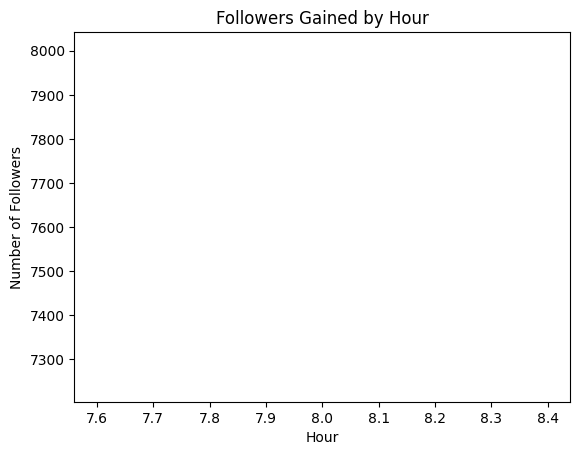

Best Hour to Gain Followers: 8


In [26]:
hourly_follow = df.groupby("Hour").size()

plt.figure()
hourly_follow.plot(kind="line")
plt.title("Followers Gained by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Followers")
plt.show()

best_hour = hourly_follow.idxmax()
print("Best Hour to Gain Followers:", best_hour)

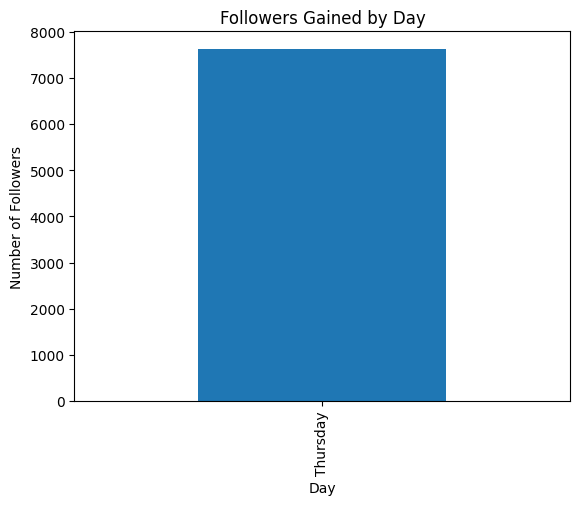

Best Day to Gain Followers: Thursday


In [27]:
daily_follow = df.groupby("Day").size()

plt.figure()
daily_follow.plot(kind="bar")
plt.title("Followers Gained by Day")
plt.xlabel("Day")
plt.ylabel("Number of Followers")
plt.show()

best_day = daily_follow.idxmax()
print("Best Day to Gain Followers:", best_day)

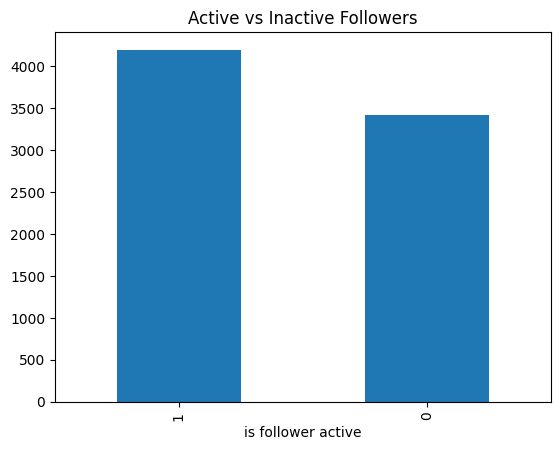

is follower active
1    4197
0    3426
Name: count, dtype: int64


In [28]:
active_analysis = df["is follower active"].value_counts()

plt.figure()
active_analysis.plot(kind="bar")
plt.title("Active vs Inactive Followers")
plt.show()

print(active_analysis)

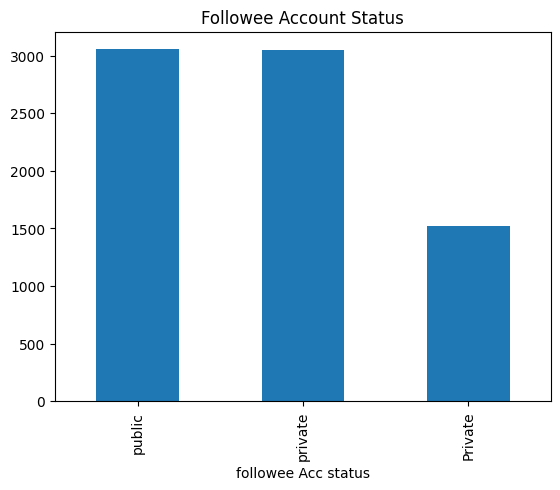

followee Acc status
public     3054
private    3049
Private    1520
Name: count, dtype: int64


In [29]:
acc_status = df["followee Acc status"].value_counts()

plt.figure()
acc_status.plot(kind="bar")
plt.title("Followee Account Status")
plt.show()

print(acc_status)

/tmp/ipython-input-3631053373.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['like_count'].fillna(0, inplace=True)
/tmp/ipython-input-3631053373.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 